In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import explained_variance_score,r2_score, max_error, mean_absolute_error, median_absolute_error, mean_squared_error
from math import sqrt
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
%matplotlib inline

In [33]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [34]:
init_notebook_mode(connected=True)
cf.go_offline()

In [35]:
df=pd.read_csv('DIETHYLENEGLYCOL.csv')

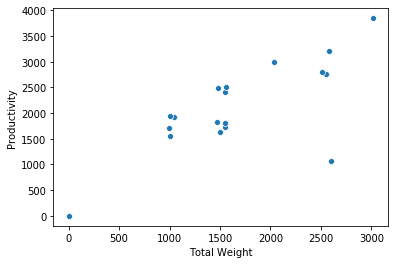

In [36]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [37]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0,19.0,19.000000,19.000000,15.000000
mean,393.000000,194082.263158,17.210526,24.885263,1578.624474,0.017368,0.001737,0.0,0.0,6.590000,2009.864211,25189.325333
std,98.992143,3509.932127,12.419028,21.439779,830.709043,0.009912,0.000991,0.0,0.0,15.698322,977.872983,23179.912832
min,175.000000,191103.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,7880.000000
25%,357.500000,192112.500000,14.125000,15.875000,1027.203000,0.010000,0.001000,0.0,0.0,0.000000,1662.725000,14494.000000
50%,435.000000,192568.000000,16.280000,17.580000,1549.260000,0.020000,0.002000,0.0,0.0,0.000000,1924.780000,18271.000000
75%,472.500000,193203.500000,20.990000,27.650000,2270.467000,0.025000,0.002500,0.0,0.0,1.250000,2637.335000,25789.500000
max,496.000000,200898.000000,58.750000,82.170000,3016.479000,0.030000,0.003000,0.0,0.0,60.580000,3844.010000,102607.000000


In [38]:
df=df[df['Productivity']>1100]
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0,16.0,16.000000,16.000000,13.000000
mean,391.875000,194395.187500,14.170000,21.620000,1712.047875,0.018750,0.001875,0.0,0.0,6.456875,2320.263750,26409.836923
std,105.761918,3752.802583,7.629657,20.920308,638.324875,0.008062,0.000806,0.0,0.0,16.637579,668.208476,24542.453660
min,175.000000,191103.000000,0.000000,0.000000,991.314000,0.010000,0.001000,0.0,0.0,0.000000,1547.660000,7880.000000
25%,341.750000,192178.250000,13.610000,15.140000,1361.387500,0.010000,0.001000,0.0,0.0,0.000000,1792.887500,15660.000000
50%,443.000000,192639.000000,15.520000,16.710000,1549.379500,0.020000,0.002000,0.0,0.0,0.000000,2170.970000,18271.000000
75%,472.250000,194962.000000,19.572500,21.127500,2150.335000,0.022500,0.002250,0.0,0.0,0.400000,2773.752500,25689.000000
max,496.000000,200898.000000,22.120000,82.170000,3016.479000,0.030000,0.003000,0.0,0.0,60.580000,3844.010000,102607.000000


In [39]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [40]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
print(lm.intercept_)

462.06247751426076


In [42]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,1.033654


In [43]:
predictions = lm.predict(X_test)

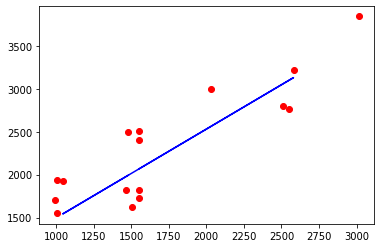

In [44]:
plt.scatter(X,y,color='red')
plt.plot(X_test,predictions,color='blue')

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test, predictions))

MAE: 346.3883531330614
MSE: 136971.90774973878
RMSE: 370.09715987796875
r2_score: 0.09135804479363618


In [46]:
joblib.dump(lm,"Diethylene_Glycol.pkl")#only execute if rmse is less than half of mean of productivity

['Diethylene_Glycol.pkl']